<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1LSTM_d1(validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


656/656 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9299 - loss: 0.2670 - val_accuracy: 0.9468 - val_loss: 0.2118
Epoch 2/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9401 - loss: 0.2306 - val_accuracy: 0.9468 - val_loss: 0.2094
Epoch 3/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9417 - loss: 0.2251 - val_accuracy: 0.9468 - val_loss: 0.2113
Epoch 4/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9400 - loss: 0.2305 - val_accuracy: 0.9468 - val_loss: 0.2088
Epoch 5/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9399 - loss: 0.2298 - val_accuracy: 0.9468 - val_loss: 0.2081
Epoch 6/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9406 - loss: 0.2282 - val_accuracy: 0.9468 - val_loss: 0.2083
Epoch 7/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9392 - loss: 0.2323 - val_accuracy: 0.9468 - val_loss: 0.2082
Epoch 8/30
656/656 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9397 - loss: 0.2304 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


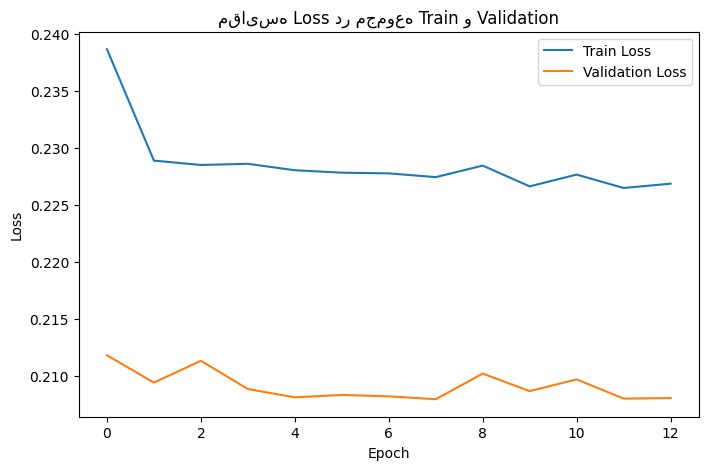

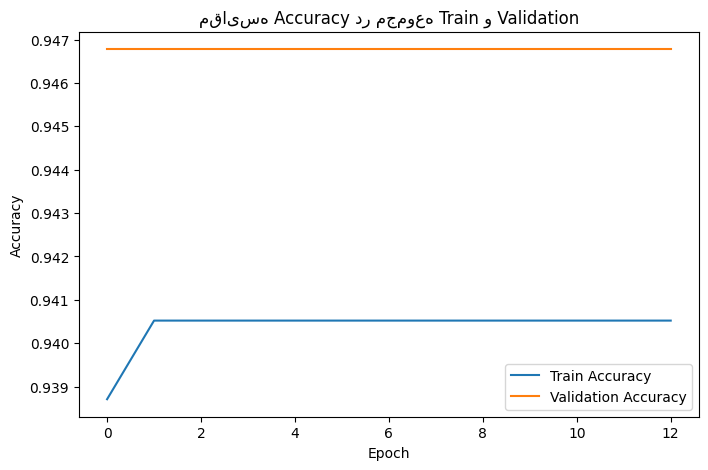

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/d1.csv"
df = pd.read_csv(file_path)

feature_columns = ["B", "C", "D", "E", "F", "G", "H", "I", "J"]
target_column = "A"

X_data = df[feature_columns].values
y_data = df[target_column].values

num_features = X_data.shape[1]

time_steps = 10

X_sequences = []
y_sequences = []

for i in range(len(X_data) - time_steps):
    X_sequences.append(X_data[i: i + time_steps])
    y_sequences.append(y_data[i + time_steps])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, num_features)
X_val = X_val.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, time_steps, num_features)
X_val = X_val.reshape(-1, time_steps, num_features)
X_test = X_test.reshape(-1, time_steps, num_features)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"✅ دقت مدل روی داده‌های تست: {test_accuracy * 100:.2f}%")
print("\n📊 گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('مقایسه Loss در مجموعه Train و Validation')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('مقایسه Accuracy در مجموعه Train و Validation')
plt.legend()
plt.show()
